# **ESTI019 - 3QS2021 - CSM - Minami**
# **Lab3 - Codificação de Imagem por DCT e Animação**

<h2> Objetivos: </h2>

1.   Produzir um vídeo de animação para o Grupo com Blender
2.   Efetuar conversões entre espaços de cores
3.   Comparar arquivos comprimidos JPEG
4.   Efetuar compressão de imagem com DCT








# 1. *Produzir um vídeo de animação para o Grupo com Blender*

Vejam o vídeo de como efetuar uma animação básica usando o Blender (instalação recomendada 2.8):


https://youtu.be/xz4t1j2-1gs



# 2. *Efetuar conversões entre espaços de cores*

In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [24]:
from google.colab import drive

drive.mount('/content/drive/')

!ls -l "drive/My Drive/Colab Notebooks/Colab_Lab3_2021"   # verifica se montou o drive e se os arquivos estão lá...
bgr1 = cv.imread('drive/My Drive/Colab Notebooks/Colab_Lab3_2021/messi5.jpg') # leitura no formato BGR!
altura, largura, camadas = bgr1.shape
print("Resolução: ", largura, " x ", altura, "PIXELS. ", camadas, " camadas.")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
total 2371
-rw------- 1 root root    2556 Oct  8 02:53 bola.jpg
-rw------- 1 root root  197218 Oct  6 14:39 grupo.jpg
-rw------- 1 root root  786486 Oct  1 13:28 lena.bmp
-rw------- 1 root root   72937 Sep 30 15:29 messi5.jpg
-rw------- 1 root root 1367352 Oct  8 02:52 Parte4.ipynb
Resolução:  548  x  342 PIXELS.  3  camadas.


Separa os canais e re-arranja para formar imagem RGB

In [25]:
b1, g1, r1 = cv.split(bgr1)
rgb2 = cv.merge([r1,g1,b1])
# Q1 - O que foi feito aqui?

Imprime cores trocadas (BGR) e reais (RGB) 

Text(0.5, 1.0, 'RBG')

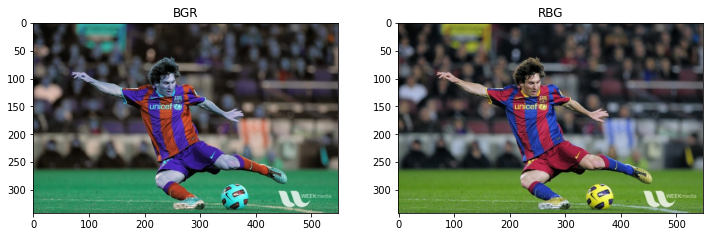

In [26]:
plt.figure(figsize=[12, 5])
plt.subplot(121); plt.imshow(bgr1); plt.title('BGR')
plt.subplot(122); plt.imshow(rgb2); plt.title('RBG')

Converte para os formatos YCrCb e HSV

Text(0.5, 1.0, 'HSV')

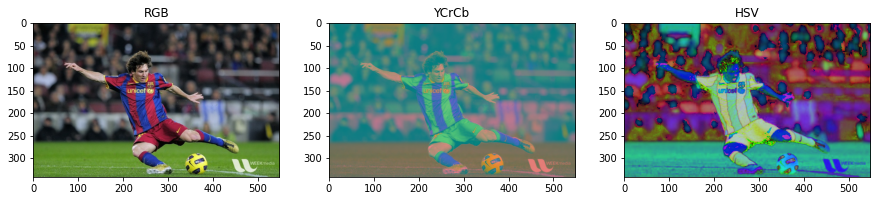

In [27]:
ycrcb = cv.cvtColor(bgr1, cv.COLOR_BGR2YCrCb)
hsv = cv.cvtColor(bgr1, cv.COLOR_BGR2HSV)
plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(rgb2); plt.title('RGB')
plt.subplot(132); plt.imshow(ycrcb); plt.title('YCrCb')
plt.subplot(133); plt.imshow(hsv); plt.title('HSV')

Separação das Camadas RGB individualmente

Text(0.5, 1.0, 'RGB_Camada B')

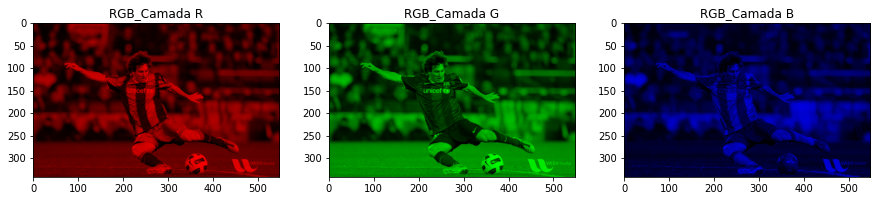

In [28]:
imageR = rgb2.copy()
imageR[:, :, 1:3] = 0
imageG = rgb2.copy()
imageG[:, :, 0] = 0; imageG[:, :, 2] = 0
imageB = rgb2.copy()
imageB[:, :, 0:2] = 0     
# Q2 - O que foi feito aqui?

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(imageR); plt.title('RGB_Camada R')
plt.subplot(132); plt.imshow(imageG); plt.title('RGB_Camada G')
plt.subplot(133); plt.imshow(imageB); plt.title('RGB_Camada B')

Separação dos Canais YCbCr

Text(0.5, 1.0, 'YCrCb_Cb')

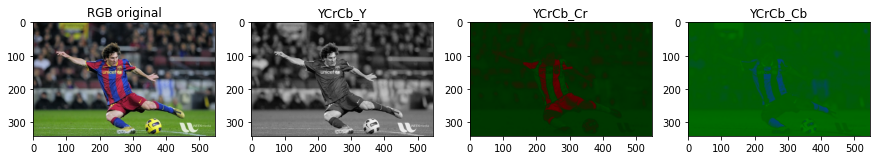

In [29]:
y1, cr1, cb1 = cv.split(ycrcb)
imageCR = ycrcb.copy()
imageCR[:, :, 0] = 0
imageCR[:, :, 2] = 0
Cr = cv.cvtColor(imageCR, cv.COLOR_YCrCb2RGB)

imageCB = ycrcb.copy()
imageCB[:, :, 0] = 0
imageCB[:, :, 1] = 0
Cb = cv.cvtColor(imageCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=[15, 5])
plt.subplot(141); plt.imshow(rgb2); plt.title('RGB original')
plt.subplot(142); plt.imshow(y1, cmap='gray'); plt.title('YCrCb_Y')
plt.subplot(143); plt.imshow(Cr); plt.title('YCrCb_Cr')
plt.subplot(144); plt.imshow(Cb); plt.title('YCrCb_Cb')


# Com as Imagens do Grupo:


1.   Faça o mesmo com uma imagem de cada integrante do grupo e
2.   Com a foto montagem de todos os do grupo, lembrando das roupas com cores diferentes, preferencialmente (R, G e B).



********************************************************************************

# 3. *Comparar arquivos comprimidos JPEG*
*COMPRESSÃO DE IMAGENS COM PERDAS*

================================================================================


*   O formato JPEG permite compressão da imagem ao salvá-la num arquivo com o comando imwrite().

*   A compressão afeta a qualidade da imagem, sendo controlada pelo parâmetro IMWRITE_JPEG_QUALITY entre 0-100, sendo que quanto maior, melhor a qualidade. O default é 95.




Text(0.5, 1.0, 'JPEG fator 05')

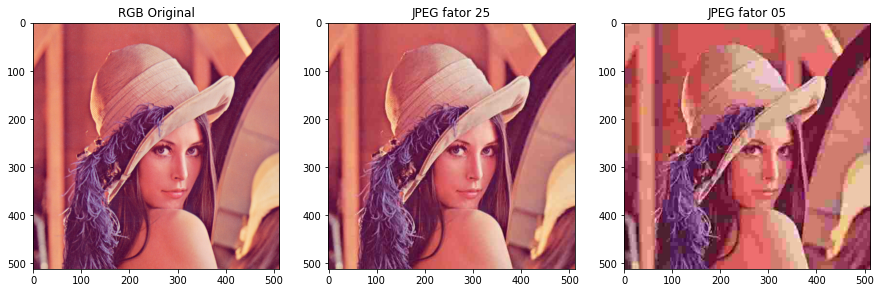

In [30]:
bgr = cv.imread('drive/My Drive/Colab Notebooks/Colab_Lab3_2021/lena.bmp')  # formato BGR

# salva com menor qualidade, fatores 25 e 5
cv.imwrite('lena25.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 25])
cv.imwrite('lena05.jpg', bgr, [cv.IMWRITE_JPEG_QUALITY, 5])

# leitura para visualização e conversão para acertar a cor
rgb = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
bgr25 = cv.imread('lena25.jpg'); rgb25 = cv.cvtColor(bgr25, cv.COLOR_BGR2RGB)
bgr05 = cv.imread('lena05.jpg'); rgb05 = cv.cvtColor(bgr05, cv.COLOR_BGR2RGB)

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(rgb); plt.title('RGB Original')
plt.subplot(132); plt.imshow(rgb25); plt.title('JPEG fator 25')
plt.subplot(133); plt.imshow(rgb05); plt.title('JPEG fator 05')

# COM AS FOTOS DO GRUPO


1.   Repita o procedimento para cada uma das fotos dos integrantes do grupo e para a foto-montagem do grupo todo
2.   Leia o tamanho dos arquivos (em bytes) e faça uma tabela comparando os tamanhos originais e os comprimidos e calcule a porcentagem de compressão de cada arquivo destes tamanhos na tabela construída



********************************************************************************
# TRANSFORMADA DISCRETA COSSENO
********************************************************************************

# *4. Efetuar compressão de imagem com DCT*

Nesta parte calcule a DCT em bloco de 8x8 da imagem, referente à bola

(1)
Matriz 8x8: componente Y original
[[ 44  93 111  89  92  65  53  99]
 [121  55  43  49  67  68 152 223]
 [ 40  73  38  66 159 218 217 213]
 [ 66  50 145 213 219 224 223 226]
 [114 198 215 215 213 220 220 223]
 [208 215 212 212 216 219 223 223]
 [209 213 210 216 219 217 221 225]
 [188 179 194 206 210 222 219 231]]
(2)
Imagem Y 8x8 (formato ponto flutuante)
[[0.17 0.36 0.44 0.35 0.36 0.25 0.21 0.39]
 [0.47 0.22 0.17 0.19 0.26 0.27 0.6  0.87]
 [0.16 0.29 0.15 0.26 0.62 0.85 0.85 0.84]
 [0.26 0.2  0.57 0.84 0.86 0.88 0.87 0.89]
 [0.45 0.78 0.84 0.84 0.84 0.86 0.86 0.87]
 [0.82 0.84 0.83 0.83 0.85 0.86 0.87 0.87]
 [0.82 0.84 0.82 0.85 0.86 0.85 0.87 0.88]
 [0.74 0.7  0.76 0.81 0.82 0.87 0.86 0.91]]
(3)
DCT de Y (ponto flutuante)
[[ 5.17 -0.85 -0.01 -0.08  0.04 -0.06  0.01  0.01]
 [-1.54 -0.3   0.16 -0.04  0.06 -0.06  0.    0.04]
 [-0.51  0.43  0.26 -0.05  0.08 -0.04  0.02  0.03]
 [ 0.13  0.6  -0.07 -0.22 -0.06 -0.06 -0.02  0.01]
 [ 0.01  0.07 -0.42 -0.19 -0.03  0.02  0.06 -0.02]
 [ 0.02

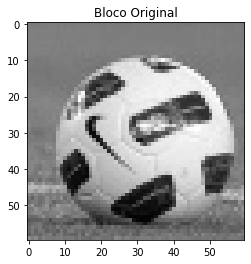

In [31]:
img = cv.imread('drive/My Drive/Colab Notebooks/Colab_Lab3_2021/messi5.jpg')
alt, larg, cam = img.shape

ycbcr = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
y, cr, cb = cv.split(ycrcb)

bola = y[280:340, 330:390]
h, w = bola.shape

cx = round(w/2)
cy = round(h/2)

plt.imshow(bola,'gray'); plt.title('Bloco Original')
cv.imwrite("/content/drive/My Drive/Colab Notebooks/Colab_Lab3_2021/bola.jpg", bola)

# Escolhendo um pedaço da imagem "BOLA"
bloco8x8 = bola[cx-12:cx-4, cy-12:cy-4]
print("(1)"); print("Matriz 8x8: componente Y original")
print(bloco8x8)

bloco8x8f = np.float32(bloco8x8)/255.0  # conversão para float
dct8x8f = cv.dct(bloco8x8f)   # calcula a DCT
dct8x8 = np.int64( (dct8x8f*255.0)) # coversão para inteiro

print("(2)"); print("Imagem Y 8x8 (formato ponto flutuante)")
print( np.around(bloco8x8f, decimals = 2) )

print("(3)"); print("DCT de Y (ponto flutuante)")
print( np.around(dct8x8f, decimals = 2) )

print("(4)"); print("DCT de Y (formato inteiro)")
print(dct8x8)



ZERANDO manualmente da diagonal da DCT as componentes AC

In [32]:
dct8x8fz = dct8x8f.copy()
dct8x8fz[0,7] = 0
dct8x8fz[1,6:8] = 0
dct8x8fz[2,5:8] = 0
dct8x8fz[3,4:8] = 0
dct8x8fz[4,3:8] = 0
dct8x8fz[5,2:8] = 0
dct8x8fz[6,1:8] = 0
dct8x8fz[7,0:8] = 0
print( np.around(dct8x8fz, decimals = 2))


[[ 5.17 -0.85 -0.01 -0.08  0.04 -0.06  0.01  0.  ]
 [-1.54 -0.3   0.16 -0.04  0.06 -0.06  0.    0.  ]
 [-0.51  0.43  0.26 -0.05  0.08  0.    0.    0.  ]
 [ 0.13  0.6  -0.07 -0.22  0.    0.    0.    0.  ]
 [ 0.01  0.07 -0.42  0.    0.    0.    0.    0.  ]
 [ 0.02 -0.03  0.    0.    0.    0.    0.    0.  ]
 [-0.03  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]]


Zerando mais DUAS DIAGONAIS ACIMA DA PRINCIPAL além destas

In [33]:
dct8x8fz2 = dct8x8f.copy()
dct8x8fz2[0,5:8] = 0
dct8x8fz2[1,4:8] = 0
dct8x8fz2[2,3:8] = 0
dct8x8fz2[3,2:8] = 0
dct8x8fz2[4,1:8] = 0
dct8x8fz2[5,0:8] = 0
dct8x8fz2[6,0:8] = 0
dct8x8fz2[7,0:8] = 0
print( np.around(dct8x8fz2, decimals = 2))

[[ 5.17 -0.85 -0.01 -0.08  0.04  0.    0.    0.  ]
 [-1.54 -0.3   0.16 -0.04  0.    0.    0.    0.  ]
 [-0.51  0.43  0.26  0.    0.    0.    0.    0.  ]
 [ 0.13  0.6   0.    0.    0.    0.    0.    0.  ]
 [ 0.01  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]]


Bloco Original e Reconstruído com Zeros das componentes AC da diagonal para baixo zerados

Text(0.5, 1.0, 'Rec. 2diag. Extra')

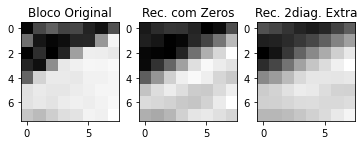

In [34]:
bloco8x8recz = cv.idct(dct8x8fz)
bloco8x8recz2 = cv.idct(dct8x8fz2)

plt.subplot(131); plt.imshow(bloco8x8,'gray'); plt.title('Bloco Original')
plt.subplot(132); plt.imshow(bloco8x8recz,'gray'); plt.title('Rec. com Zeros')
plt.subplot(133); plt.imshow(bloco8x8recz2,'gray'); plt.title('Rec. 2diag. Extra')


# Escolha outro bloco de 8x8 da imagem e:
 

1.   refaça este procedimento zerando mais DUAS DIAGONAIS ACIMA DA PRINCIPAL além destas
2.   Compare e comente as imagens do bloco original e reconstruída


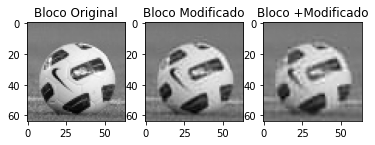

In [35]:
img = cv.imread('drive/My Drive/Colab Notebooks/Colab_Lab3_2021/messi5.jpg')
alt, larg, cam = img.shape

ycbcr = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
y, cr, cb = cv.split(ycrcb)

bolaf = y[276:340, 330:394]

bola= np.float32(bolaf)/255.0 
bola2 = bola.copy()
h, w = bola.shape


cv.imwrite("/content/drive/My Drive/Colab Notebooks/Colab_Lab3_2021/bola.jpg", bola)
cy = 0
cx = 0
while cy < 64:
 cx =  0
 while cx < 64:

# Escolhendo um pedaço da imagem "BOLA"
  bloco8x8 = bola[cx:cx+8, cy:cy+8]
  bloco8x8f = np.float32(bloco8x8)/255.0  # conversão para float
 

  dct8x8fz =  cv.dct(bloco8x8f)
  dct8x8fz2 = cv.dct(bloco8x8f)   
                              # calcula a DCT
  dct8x8fz[0,7] = 0
  dct8x8fz[1,6:8] = 0
  dct8x8fz[2,5:8] = 0
  dct8x8fz[3,4:8] = 0
  dct8x8fz[4,3:8] = 0
  dct8x8fz[5,2:8] = 0
  dct8x8fz[6,1:8] = 0
  dct8x8fz[7,0:8] = 0

  dct8x8fz2[0,5:8] = 0
  dct8x8fz2[1,4:8] = 0
  dct8x8fz2[2,3:8] = 0
  dct8x8fz2[3,2:8] = 0
  dct8x8fz2[4,1:8] = 0
  dct8x8fz2[5,0:8] = 0
  dct8x8fz2[6,0:8] = 0
  dct8x8fz2[7,0:8] = 0

  bola2[cx:cx+8, cy:cy+8] = cv.idct(dct8x8fz2)
  bola[cx:cx+8, cy:cy+8] = cv.idct(dct8x8fz)
  cx += 8
 else:
  cy+=8
else:
 plt.subplot(131);plt.imshow(bolaf,'gray'); plt.title('Bloco Original')
 plt.subplot(132);plt.imshow(bola,'gray'); plt.title('Bloco Modificado')
 plt.subplot(133);plt.imshow(bola2,'gray'); plt.title('Bloco +Modificado')




                                                   -X-X-X-










